In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import warnings
# warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
from scipy.special import expit

In [2]:
data = pd.read_csv('test_USA.csv')
data = data.fillna(0)
data.shape

(33000, 306)

In [17]:
X = data.iloc[:, :-1]  # Select all columns except the last one
y=data["GSNR_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#======Converting to Arrays=========
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
#========end=======================
#=======Reshaping Labels===========
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
#======end========================
#===========printing Shapes======
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26400, 305)
(26400, 1)
(6600, 305)
(6600, 1)


In [18]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)
label_scaler=MinMaxScaler()
label_scaler.fit(y_train)
y_train=label_scaler.transform(y_train)
y_test=label_scaler.transform(y_test)
print(X_train.shape)

(26400, 305)


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(305, activation='relu', input_shape=(305,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu' ),
    tf.keras.layers.Dense(1,activation='linear')
])
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)#0.001
model.compile(optimizer=optimizer, loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 305)               93330     
                                                                 
 dense_8 (Dense)             (None, 256)               78336     
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 1)                

In [20]:
model_history=model.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0],validation_data=(X_test,y_test)
          ,verbose=2)#600


Epoch 1/100
1/1 - 4s - loss: 0.0856 - val_loss: 0.1502 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.1487 - val_loss: 0.0579 - 428ms/epoch - 428ms/step
Epoch 3/100
1/1 - 1s - loss: 0.0563 - val_loss: 0.0536 - 508ms/epoch - 508ms/step
Epoch 4/100
1/1 - 1s - loss: 0.0518 - val_loss: 0.0449 - 596ms/epoch - 596ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0437 - val_loss: 0.0372 - 407ms/epoch - 407ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0365 - val_loss: 0.0379 - 410ms/epoch - 410ms/step
Epoch 7/100
1/1 - 1s - loss: 0.0375 - val_loss: 0.0364 - 667ms/epoch - 667ms/step
Epoch 8/100
1/1 - 0s - loss: 0.0359 - val_loss: 0.0339 - 436ms/epoch - 436ms/step
Epoch 9/100
1/1 - 0s - loss: 0.0330 - val_loss: 0.0341 - 420ms/epoch - 420ms/step
Epoch 10/100
1/1 - 0s - loss: 0.0327 - val_loss: 0.0347 - 456ms/epoch - 456ms/step
Epoch 11/100
1/1 - 1s - loss: 0.0331 - val_loss: 0.0328 - 558ms/epoch - 558ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0313 - val_loss: 0.0307 - 435ms/epoch - 435ms/step
Epoch 13/100
1/1 - 

Epoch 100/100
1/1 - 0s - loss: 0.0044 - val_loss: 0.0189 - 495ms/epoch - 495ms/step


(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>)

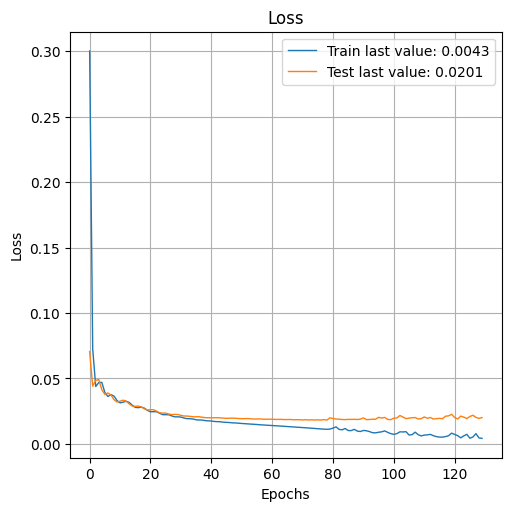

In [7]:
from plot_keras_history import plot_history
plot_history(model_history,show_standard_deviation=False,
    show_average=True)

In [8]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
print(mse)

207/207 [==============================] - 1s 3ms/step
0.020138429432009636


In [10]:
model.save("test_USA.h5")